In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from graphviz import Source
from sklearn.tree import export_graphviz

!pip install graphviz

In [12]:
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv") 

FileNotFoundError: [Errno 2] File b'train.csv' does not exist: b'train.csv'

In [ ]:
#merge two datasets
titanic = pd.concat([trainData, testData], sort=True)

In [68]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [69]:
titanic.info()
# pay attention to object data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


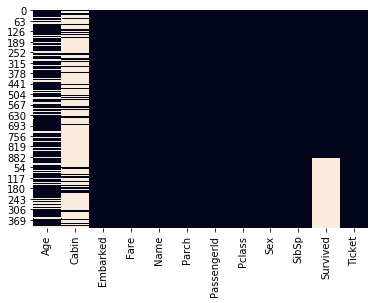

In [70]:
sns.heatmap(titanic.isnull(), cbar=False)
# the figure shows the null values.

In [71]:
# Drop Cabin
titanic.drop('Cabin',axis=1, inplace=True)
# Drop Name
titanic.drop('Name',axis=1, inplace=True)
# Drop ticket
titanic.drop('Ticket',axis=1, inplace=True)
# drop passenger id
titanic.drop('PassengerId',axis=1, inplace=True)



In [72]:
#remove rows that has null values for fare and embarked
titanic.dropna(subset=['Fare','Embarked'],inplace=True)


In [73]:
# convert embark to category
titanic['Embarked'] = titanic['Embarked'].astype('category')
#convert sext to category
titanic['Sex'] = titanic['Sex'].astype('category')
#convert Pclass to category
titanic['Pclass'] = titanic['Pclass'].astype('category')


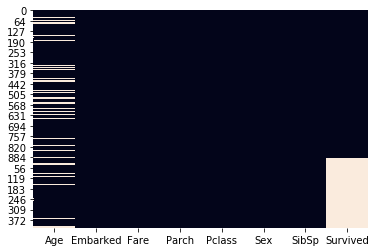

In [74]:
sns.heatmap(titanic.isnull(), cbar=False)
#data frame has null values only for survived and age.

In [75]:
titanic.info()
#all values are numeric except embarked,pclass and sex

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 8 columns):
Age         1043 non-null float64
Embarked    1306 non-null category
Fare        1306 non-null float64
Parch       1306 non-null int64
Pclass      1306 non-null category
Sex         1306 non-null category
SibSp       1306 non-null int64
Survived    889 non-null float64
dtypes: category(3), float64(3), int64(2)
memory usage: 65.3 KB


In [76]:
#convert categorical data to numerical
df_Embarked= pd.get_dummies(titanic['Embarked'],'embark')
df_Pclass = pd.get_dummies(titanic['Pclass'],'pclass')
df_sex = pd.get_dummies(titanic['Sex'],'sex')

#Concat new columns to original dataframe 
titanic = pd.concat([titanic, df_Embarked, df_Pclass,df_sex], axis=1)

In [77]:
# drop original categorical variables
titanic.drop(columns=['Embarked','Pclass','Sex'], axis=1,inplace=True)

In [78]:
titanic.head()

,Age,Fare,Parch,SibSp,Survived,embark_C,embark_Q,embark_S,pclass_1,pclass_2,pclass_3,sex_female,sex_male
0,22.0,7.2500,0,1,0.0,0,0,1,0,0,1,0,1
1,38.0,71.2833,0,1,1.0,1,0,0,1,0,0,1,0
2,26.0,7.9250,0,0,1.0,0,0,1,0,0,1,1,0
3,35.0,53.1000,0,1,1.0,0,0,1,1,0,0,1,0
4,35.0,8.0500,0,0,0.0,0,0,1,0,0,1,0,1


In [79]:
#split the data into two sets, one with age, one without age
#we will use data_with_age to build the model
data_age_missing = titanic[titanic['Age'].isnull()]
data_with_age = titanic[titanic['Age'].notnull()]

In [80]:
#build training and testing dataset

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(data_with_age.drop(columns=['Age','Survived'],axis=1), data_with_age['Age'], test_size=0.2, random_state=42)

In [83]:
#build a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [84]:
# get rmse
from sklearn.metrics import mean_squared_error

age_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, age_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

6.736322004142856

In [85]:
# mae(mean absolute error) is also another metric
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, age_predictions)
lin_mae

3.970280836700642

In [86]:
#cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

# RMSE scores for cross-validation differ a lot from that of original model. This means we have overfitting model.

array([13.87872169, 14.01242303, 15.00057512, 17.22657665, 15.99646382])

In [87]:
# the model is overfitting!!!

In [88]:
# We regularize model by setting some hyperparameters. 

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 16 (4×4) combinations of hyperparameters
    {'min_samples_leaf': [3, 10, 30,50], 'max_features': [2, 4, 6, 8]}
  ]

# train across 5 folds, that's a total of (16)*5=80 rounds of training 
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'min_samples_leaf': [3, 10, 30, 50]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
      

In [89]:
#get best parameters from gridsearchcv
grid_search.best_params_

{'max_features': 6, 'min_samples_leaf': 30}

In [90]:
#build another model with the best parameters from gridsearchcv
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42, max_features=6, min_samples_leaf=30)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=30, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [91]:
#get rmse for new model
age_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, age_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

12.04893972243413

In [92]:
#get rmse for cross-validation models
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([12.06409772, 13.29934834, 11.52217489, 12.8390814 , 12.04889579])

In [93]:
# rmse values are very similar. We no longer have overfitting issue.

In [94]:
# make predictions for null values in data_age_missing data set
Age_predictions_for_missing_data = tree_reg.predict(data_age_missing.drop(columns=['Age','Survived'],axis=1))

In [95]:
#build a dataframe containing predictions. 
#please pay attention to index. It must be data_age_missing's index info so that have matching predictions.
predicted_age_df = pd.DataFrame(Age_predictions_for_missing_data, index=data_age_missing.index, columns=['Age'])


In [96]:
# put predictions back into data_age-missing
data_age_missing = pd.concat([predicted_age_df, data_age_missing.drop(['Age'],axis=1)], axis=1)
data_age_missing

,Age,Fare,Parch,SibSp,Survived,embark_C,embark_Q,embark_S,pclass_1,pclass_2,pclass_3,sex_female,sex_male
5,27.822870,8.4583,0,0,0.0,0,1,0,0,0,1,0,1
17,33.520408,13.0000,0,0,1.0,0,0,1,0,1,0,0,1
19,24.884058,7.2250,0,0,1.0,1,0,0,0,0,1,1,0
26,27.822870,7.2250,0,0,0.0,1,0,0,0,0,1,0,1
28,24.884058,7.8792,0,0,1.0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,24.884058,7.7208,0,0,NaN,0,1,0,0,0,1,1,0
410,24.884058,7.7500,0,0,NaN,0,1,0,0,0,1,1,0
413,27.822870,8.0500,0,0,NaN,0,0,1,0,0,1,0,1
416,27.822870,8.0500,0,0,NaN,0,0,1,0,0,1,0,1


In [97]:
# merge two datasets
titanic = pd.concat([data_age_missing,data_with_age], sort=True)


In [98]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 5 to 415
Data columns (total 13 columns):
Age           1306 non-null float64
Fare          1306 non-null float64
Parch         1306 non-null int64
SibSp         1306 non-null int64
Survived      889 non-null float64
embark_C      1306 non-null uint8
embark_Q      1306 non-null uint8
embark_S      1306 non-null uint8
pclass_1      1306 non-null uint8
pclass_2      1306 non-null uint8
pclass_3      1306 non-null uint8
sex_female    1306 non-null uint8
sex_male      1306 non-null uint8
dtypes: float64(3), int64(2), uint8(8)
memory usage: 71.4 KB


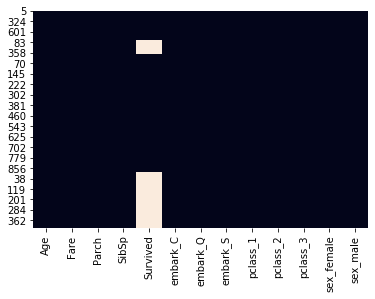

In [99]:
sns.heatmap(titanic.isnull(), cbar=False)

In [ ]:
###

In [ ]:
results = pd.DataFrame({
    'actual': y_test,
    'prediction': predictions
})
results